#### **Import Libaries**

In [44]:
import jax 
import jax.numpy as jnp 
import matplotlib.pyplot as plt

#### **Plotting**

In [50]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn-v0_8-dark-palette')
from matplotlib import font_manager 
locations =  './../../styles/Newsreader'
font_files = font_manager.findSystemFonts(fontpaths=locations)
print(locations)
print(font_files[0])
for f in font_files: 
    font_manager.fontManager.addfont(f)
plt.rcParams["font.family"] = "Newsreader"

./../../styles/Newsreader
/Users/ppower1/Documents/GitHub/llmft/styles/Newsreader/static/Newsreader_9pt/Newsreader_9pt-ExtraLight.ttf


#### **Helper Functions**

In [45]:
def get_observation(key):
    k1, k2, k3 = jax.random.split(key, 3)
    x = jax.random.bernoulli(k1, 0.5, shape=(1,)).astype(jnp.float32)
    t = jax.random.bernoulli(k2, 0.5, shape=(1,)).astype(jnp.float32)
    y = jax.random.normal(k3, shape=(1,))
    return x, t, t*y

def get_sample(n, key):
    return jax.vmap(get_observation)(jax.random.split(key, n))

def est_with_known(xs, ts, tys):
    return jnp.mean(tys/0.5)

def est_with_unknown(xs, ts, tys):
    p0 = jnp.mean(ts, where=xs==0)
    p1 = jnp.mean(ts, where=xs==1)
    p = xs * p1 + (1-xs) * p0
    return jnp.mean(tys / p)

def simulate(n=100, p_known=False, key=jax.random.PRNGKey(0)):
    xs, ts, tys = get_sample(n, key)
    est = jax.lax.cond(p_known, est_with_known, est_with_unknown, xs, ts, tys)
    return est

#### **Simulation Exercise**

In [46]:
std_known = []
std_unknown = []
ns = [20, 50, 100, 200, 300, 400, 500]
for i in ns:
    results_with_known = jax.vmap(simulate, in_axes=(None, None, 0))(i, True, jax.random.split(jax.random.PRNGKey(0), 1000))
    results_with_unknown = jax.vmap(simulate, in_axes=(None, None, 0))(i, False, jax.random.split(jax.random.PRNGKey(0), 1000))
    std_known.append(jnp.nanstd(results_with_known))
    std_unknown.append(jnp.nanstd(results_with_unknown))

#### **Plot Results**

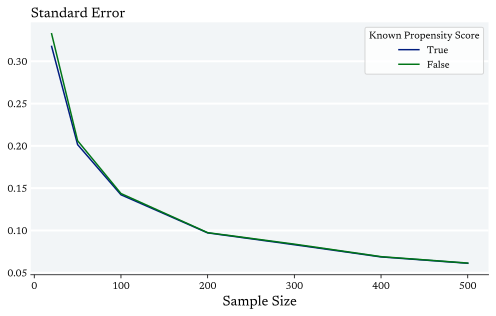

In [56]:
fig = plt.figure(dpi=300, tight_layout=True, figsize=(7, 4.5))
ax = plt.axes(facecolor=(.95, .96, .97))

# Plot customizations
for key in 'left', 'right', 'top':
    ax.spines[key].set_visible(False)
ax.text(0., 1.02, s='Standard Error', transform=ax.transAxes, size=14)
ax.yaxis.set_tick_params(length=0)
ax.yaxis.grid(True, color='white', linewidth=2)
ax.set_axisbelow(True)
plt.plot(ns, std_known, label="True")
plt.plot(ns, std_unknown, label="False")
plt.legend(title='Known Propensity Score')
plt.xlabel('Sample Size', size=14)
plt.show()